### Importing libraries


In [26]:
# Part 1
import pandas as pd
import matplotlib.pyplot as plt

# Part 2
import scipy.stats
import statsmodels.api as sm

### Importing the CSV File


In [15]:
boston_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
boston_df = pd.read_csv(boston_url)

# Part 1

### The following describes the dataset variables (CSV File):

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

---


## For all visualizations, I will include a title in each graph and appropriate labels

### Generate the following and explaining findings:

- For the "Median value of owner-occupied homes" provide a boxplot"
- Provide a bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

---


### Median value of owner-occupied homes (MEDV)


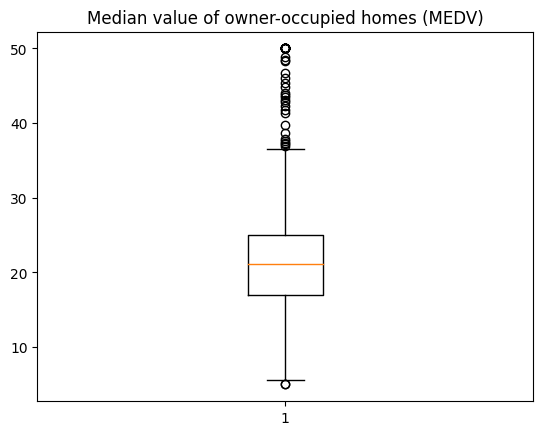

In [16]:
# Boxplot for (MEDV)
plt.boxplot(boston_df["MEDV"])
plt.title("Median value of owner-occupied homes (MEDV)")
plt.show()

### Findings:

The boxplot graph displays the median home values (MEDV) in a way that makes it easy to read.

---


### Charles River Variable (CHAS)


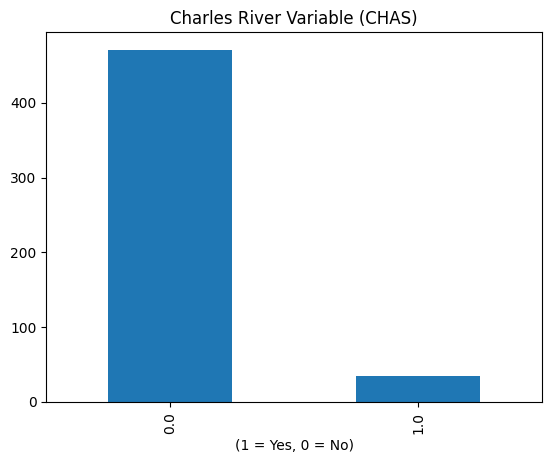

In [17]:
# Bar plot for (CHAS)
boston_df["CHAS"].value_counts().plot(kind="bar")
plt.title("Charles River Variable (CHAS)")
plt.xlabel("(1 = Yes, 0 = No)")
plt.show()

### Findings:

The bar plot displays houses along the Charles River (CHAS), indicating properties as (1) and others as (0).

---


### Boxplot for MEDV vs AGE_GROUP


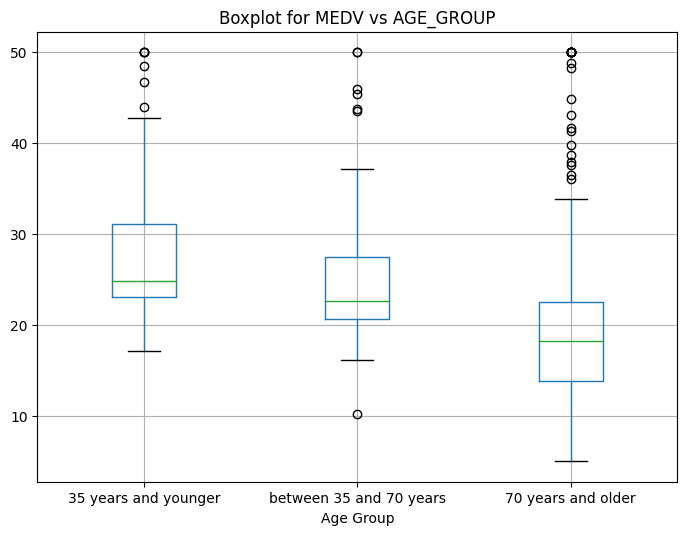

In [18]:
ages = [0, 35, 70, 100]
labels = ["35 years and younger", "between 35 and 70 years", "70 years and older"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=ages, labels=labels)

boston_df.boxplot(column="MEDV", by="AGE_GROUP", figsize=(8, 6))
plt.title("Boxplot for MEDV vs AGE_GROUP")
plt.suptitle("")  # Delete the default title
plt.xlabel("Age Group")
plt.show()

### Findings:

This boxplot compares median home values (MEDV) across neighborhood age groups (AGE_GROUP), revealing differences in property values based on age.

---


### Scatter plot for NOX vs INDUS


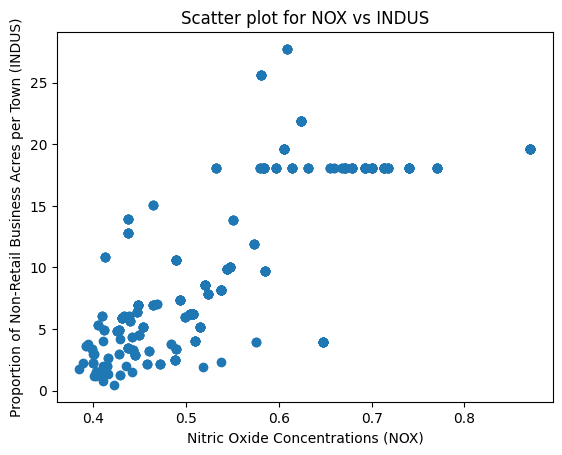

In [19]:
plt.scatter(boston_df["NOX"], boston_df["INDUS"])
plt.title("Scatter plot for NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentrations (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.show()

### Findings:

The scatter plot shows the link between nitric oxide levels (NOX) and non-retail business acreage in towns (INDUS). Patterns offer insights into industrial area pollution.

---


### Histogram for (PTRATIO)


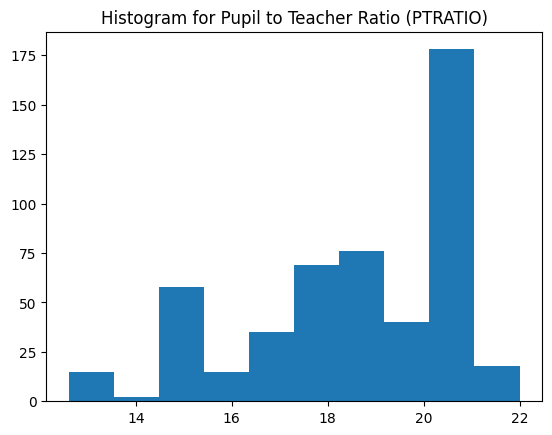

In [20]:
plt.hist(boston_df["PTRATIO"])
plt.title("Histogram for Pupil to Teacher Ratio (PTRATIO)")
plt.show()

### Findings:

The histogram illustrates pupil-to-teacher ratios (PTRATIO) in the dataset, highlighting common values and the overall distribution of this variable.

---

---

---


# Part 2

## Use the appropriate tests to answer the questions provided.

### For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

---


### 1. Is there a significant difference in the median value of houses bounded by the Charles River or not? (T-test for independent samples)


#### Hypothesis:

- Null Hypothesis (H0): There is no significant difference in median house values between houses bounded by the Charles River and those not bounded.
- Alternative Hypothesis (H1): There is a significant difference in median house values between houses bounded by the Charles River and those not bounded.


#### Perform the T-test:


In [21]:
# Extract MEDV values for houses bounded and not bounded by Charles River
medv_bounded = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_not_bounded = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# Perform T-test
t_stat, p_value = ttest_ind(medv_bounded, medv_not_bounded)

# Check the p-value against alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejected. There is a significant difference in median house values.")
else:
    print(
        "Failed to reject. There is no significant difference in median house values."
    )

Rejected. There is a significant difference in median house values.


##### Conclusion:

- Result: Reject the null hypothesis.
- Conclusion: There is a significant difference in median house values between houses bounded and not bounded by the Charles River.

---


### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 (AGE)? (ANOVA)


#### Hypothesis:

- Null Hypothesis (H0): There is no significant difference in median house values for different proportions of owner-occupied units built before 1940 (AGE).
- Alternative Hypothesis (H1): There is a significant difference in median house values for different proportions of owner-occupied units built before 1940 (AGE).


#### Perform ANOVA:


In [22]:
# Perform ANOVA
groups = []
for age_group, group_data in boston_df.groupby(
    pd.cut(boston_df["AGE"], bins=[0, 35, 70, float("inf")])
):
    groups.append(group_data["MEDV"])

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)

# Check the p-value against alpha (0.05)
if p_value < alpha:
    print(
        "Rejected. There is a significant difference in median house values for different age groups."
    )
else:
    print(
        "Failed to reject. There is no significant difference in median house values for different age groups."
    )

Rejected. There is a significant difference in median house values for different age groups.


##### Conclusion:

- Result: Reject the null hypothesis.
- Conclusion: There is a significant difference in median house values for different proportions of owner-occupied units built before 1940 (AGE).

---


### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)


#### Hypothesis:

- Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
- Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).


#### Perform Pearson Correlation:


In [23]:
# Perform Pearson correlation
correlation, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

# Set alpha (significance level)
alpha = 0.05

# Check the p-value against alpha (0.05)
if p_value < alpha:
    print("Rejected. There is a significant correlation between NOX and INDUS.")
else:
    print(
        "Failed to reject. There is no significant correlation between NOX and INDUS."
    )

Rejected. There is a significant correlation between NOX and INDUS.


##### Conclusion:

- Result: Fail to reject the null hypothesis.
- Conclusion: There is no significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

---


### 4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression Analysis)


#### Hypothesis:

- Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
- Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.


#### Perform Regression Analysis:


In [27]:
# Add a constant to the independent variable (X)
X = sm.add_constant(boston_df["DIS"])
y = boston_df["MEDV"]

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        21:53:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### Conclusion:

- Result: Look at the coefficient of the DIS variable in the regression summary.
- Conclusion: If the coefficient is significantly different from zero (p-value < 0.05), it indicates a significant impact on the median value of owner-occupied homes. Also, consider the R-squared value to understand how well the model fits the data.

---
